In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymysql
!pip install pyarabic
!pip install langdetect
!pip install Tashaphyne
!pip3 install openpyxl==3.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 907 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 31.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 27.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2d0c052ef2e108f2ef21cbc28b9d69db4102cb0732eae29459d70a44fd2421b4
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 251 kB 33.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-w

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pymysql
import random
from pyarabic.araby import strip_tashkeel,strip_tatweel,normalize_hamza,tokenize
from pyarabic import araby
from pyarabic.araby import tokenize, is_arabicrange
import re
import string
from langdetect import detect
from tashaphyne.stemming import ArabicLightStemmer
import datetime

# DATA Analysis

In [ ]:
def deleteduplication(tokens):
    popindex=set()
    for i in range(len(tokens)-1):
        if tokens[i]==tokens[i+1]:
            popindex.add(i+1)
    popindex = sorted(popindex, reverse = True)
    for i in popindex:
        tokens.pop(i)
    return tokens    

In [ ]:
def deletedigits(text):
    result = ''.join([i for i in text if not i.isdigit()])
    return result

In [ ]:
def removePunctuation(my_str):
    # define punctuation
    punctuations = '''!()-[]{};:'"\,،<>./?؟@$%^&*~'''
    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
    # display the unpunctuated string
    return no_punct

In [ ]:
def removeEmojis(my_str):
    emoji = '[#*0-9]️⃣|[©®‼⁉™ℹ↔-↙↩↪⌚⌛⌨⏏⏩-⏳⏸-⏺Ⓜ▪▫▶◀◻-◾☀-☄☎☑☔☕☘]|☝[🏻-🏿]?|[☠☢☣☦☪☮☯☸-☺♀♂♈-♓♟♠♣♥♦♨♻♾♿⚒-⚗⚙⚛⚜⚠⚡⚪⚫⚰⚱⚽⚾⛄⛅⛈⛎⛏⛑⛓⛔⛩⛪⛰-⛵⛷⛸]|⛹(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[⛺⛽✂✅✈✉]|[✊-✍][🏻-🏿]?|[✏✒✔✖✝✡✨✳✴❄❇❌❎❓-❕❗❣❤➕-➗➡➰➿⤴⤵⬅-⬇⬛⬜⭐⭕〰〽㊗㊙🀄🃏🅰🅱🅾🅿🆎🆑-🆚]|🇦[🇨-🇬🇮🇱🇲🇴🇶-🇺🇼🇽🇿]|🇧[🇦🇧🇩-🇯🇱-🇴🇶-🇹🇻🇼🇾🇿]|🇨[🇦🇨🇩🇫-🇮🇰-🇵🇷🇺-🇿]|🇩[🇪🇬🇯🇰🇲🇴🇿]|🇪[🇦🇨🇪🇬🇭🇷-🇺]|🇫[🇮-🇰🇲🇴🇷]|🇬[🇦🇧🇩-🇮🇱-🇳🇵-🇺🇼🇾]|🇭[🇰🇲🇳🇷🇹🇺]|🇮[🇨-🇪🇱-🇴🇶-🇹]|🇯[🇪🇲🇴🇵]|🇰[🇪🇬-🇮🇲🇳🇵🇷🇼🇾🇿]|🇱[🇦-🇨🇮🇰🇷-🇻🇾]|🇲[🇦🇨-🇭🇰-🇿]|🇳[🇦🇨🇪-🇬🇮🇱🇴🇵🇷🇺🇿]|🇴🇲|🇵[🇦🇪-🇭🇰-🇳🇷-🇹🇼🇾]|🇶🇦|🇷[🇪🇴🇸🇺🇼]|🇸[🇦-🇪🇬-🇴🇷-🇹🇻🇽-🇿]|🇹[🇦🇨🇩🇫-🇭🇯-🇴🇷🇹🇻🇼🇿]|🇺[🇦🇬🇲🇳🇸🇾🇿]|🇻[🇦🇨🇪🇬🇮🇳🇺]|🇼[🇫🇸]|🇽🇰|🇾[🇪🇹]|🇿[🇦🇲🇼]|[🈁🈂🈚🈯🈲-🈺🉐🉑🌀-🌡🌤-🎄]|🎅[🏻-🏿]?|[🎆-🎓🎖🎗🎙-🎛🎞-🏁]|🏂[🏻-🏿]?|[🏃🏄](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏅🏆]|🏇[🏻-🏿]?|[🏈🏉]|🏊(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏋🏌](?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏍-🏰]|🏳(?:️‍🌈)?|🏴(?:‍☠️|󠁧󠁢(?:󠁥󠁮󠁧|󠁳󠁣󠁴|󠁷󠁬󠁳)󠁿)?|[🏵🏷-👀]|👁(?:️‍🗨️)?|[👂👃][🏻-🏿]?|[👄👅]|[👆-👐][🏻-🏿]?|[👑-👥]|[👦👧][🏻-🏿]?|👨(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?👨|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|[👨👩]‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|👩(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?[👨👩]|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|👩‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|[👪-👭]|👮(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👯(?:‍[♀♂]️)?|👰[🏻-🏿]?|👱(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👲[🏻-🏿]?|👳(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[👴-👶][🏻-🏿]?|👷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👸[🏻-🏿]?|[👹-👻]|👼[🏻-🏿]?|[👽-💀]|[💁💂](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|💃[🏻-🏿]?|💄|💅[🏻-🏿]?|[💆💇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[💈-💩]|💪[🏻-🏿]?|[💫-📽📿-🔽🕉-🕎🕐-🕧🕯🕰🕳]|🕴[🏻-🏿]?|🕵(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🕶-🕹]|🕺[🏻-🏿]?|[🖇🖊-🖍]|[🖐🖕🖖][🏻-🏿]?|[🖤🖥🖨🖱🖲🖼🗂-🗄🗑-🗓🗜-🗞🗡🗣🗨🗯🗳🗺-🙄]|[🙅-🙇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🙈-🙊]|🙋(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙌[🏻-🏿]?|[🙍🙎](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙏[🏻-🏿]?|[🚀-🚢]|🚣(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚤-🚳]|[🚴-🚶](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚷-🚿]|🛀[🏻-🏿]?|[🛁-🛅🛋]|🛌[🏻-🏿]?|[🛍-🛒🛠-🛥🛩🛫🛬🛰🛳-🛹🤐-🤗]|[🤘-🤜][🏻-🏿]?|🤝|[🤞🤟][🏻-🏿]?|[🤠-🤥]|🤦(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤧-🤯]|[🤰-🤶][🏻-🏿]?|🤷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤸🤹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🤺|🤼(?:‍[♀♂]️)?|[🤽🤾](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🥀-🥅🥇-🥰🥳-🥶🥺🥼-🦢🦰-🦴]|[🦵🦶][🏻-🏿]?|🦷|[🦸🦹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧀-🧂🧐]|[🧑-🧕][🏻-🏿]?|🧖(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧗-🧝](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧞🧟](?:‍[♀♂]️)?|[🧠-🧿]'
    no_emoji = ""
    for char in my_str:
        if char not in emoji:
            no_emoji = no_emoji + char
    return no_emoji

In [ ]:
Newdata = pd.read_excel("/content/drive/My Drive/FBHealth/data/ILI_DATA.xlsx", index_col=0) 

In [ ]:
Newdata

,postid_groupid,groupid,text,time,likes,comments,shares,label,label_cat
21374,557824791044240_544094832417236,544094832417236,"أنا, جديد, معكم, هل, من, ترحيب",2016/04/24,6,1,0,Unrelated,2
21414,559053824254670_544094832417236,544094832417236,"عمليه, حسابية, خطيرة, جدا, والله, انها, اخافتن...",2016/04/28,2,0,0,Unrelated,2
21549,563928177100568_544094832417236,544094832417236,"بمجرد, تسجيل, أصدقائك, يصبح, في, رصيدك, دج, وه...",2016/05/10,2,0,0,Unrelated,2
21828,575803272579725_544094832417236,544094832417236,"أكره, فرنسا, و, كلابها",2016/06/11,3,1,0,Unrelated,2
21894,577849189041800_544094832417236,544094832417236,"اللهم, إغفر, له, و, رحمه, وثبته, عند, السؤال, ...",2016/06/16,14,0,0,Unrelated,2
...,...,...,...,...,...,...,...,...,...
21912,578315113538586_308627037174063,308627037174063,"ماهو, علاج, سعال, الجاف, ربي, يجازيكم, ان, شاء...",2021-08-01 00:00:00,0,5,0,Positive,1
14386,1453573741707868_869662733432308,869662733432308,"مافهمتش, كاين, كوفيد, ولا, مكاش",2021-08-01 00:00:00,0,7,0,Positive,1
14312,1452963865102189_869662733432308,869662733432308,"السلام, عليكم, ورحمة, الله, وبركاته, ما, هو, س...",2021-08-01 00:00:00,0,0,0,Positive,1
14308,1452940945104481_869662733432308,869662733432308,"خاوتي, الله, يحفضكم, هذو, ايزناليز, تاع, ما, ا...",2021-08-01 00:00:00,0,0,0,Positive,1


# Target

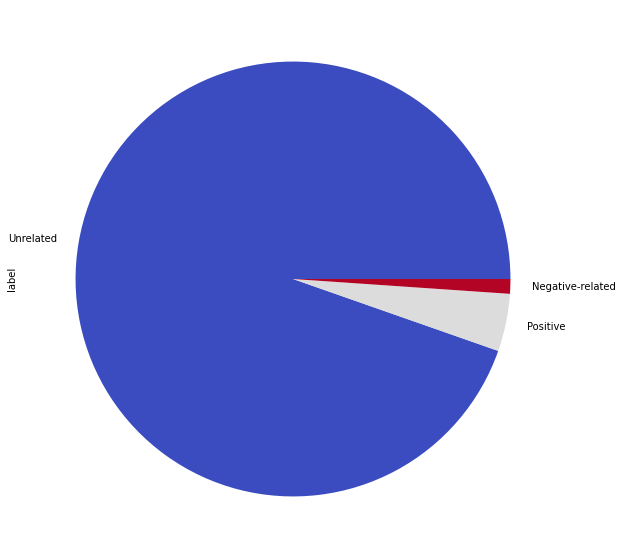

In [ ]:
Newdata['label'].value_counts().plot(kind="pie", figsize=(10,10), colormap="coolwarm")

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

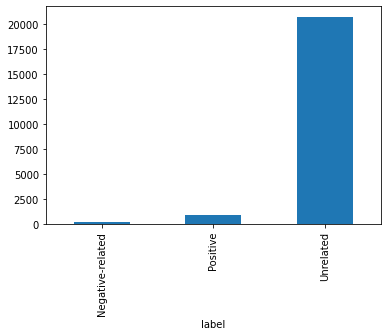

In [ ]:
Newdata.groupby(["label"]).size().plot( kind='bar')

In [ ]:
Newdata["time"]= pd.to_datetime(Newdata["time"])
Newdata["time"]=Newdata["time"].dt.strftime('%Y/%m/%d')
Newdata = Newdata.sort_values(by=['time'])

In [ ]:
Newdata["label"].value_counts()

Unrelated           20711
Positive              936
Negative-related      238
Name: label, dtype: int64

In [ ]:
resultPos = Newdata[Newdata['label'] == 'Positive']
resultPos['case'] = [1]*len(resultPos)
resultPos = resultPos.groupby(['time'])['case'].sum()
resultPos =resultPos.to_frame()

In [ ]:
resultPos.reset_index(inplace=True)
resultPos["time"]= pd.to_datetime(resultPos["time"])

In [ ]:
resultPos

,time,case
0,2019-03-11,1
1,2020-04-20,1
2,2020-05-13,1
3,2020-06-01,1
4,2020-06-06,1
...,...,...
236,2021-07-28,6
237,2021-07-29,25
238,2021-07-30,7
239,2021-07-31,5


In [ ]:
def getinversecumule(listt):
    new_list=[listt[0]]
    j=0
    for i in range(1,len(listt)):
        j=listt[i]-listt[i-1]
        new_list.append(j)

    return new_list

In [ ]:
datacovidglobal = "/content/drive/My Drive/FBHealth/time_series_covid19_confirmed_global.csv"
covid19 = pd.read_csv(datacovidglobal, index_col=0)  
covid19 = covid19[covid19['Country/Region']=='Algeria']
covid19 = covid19.drop(columns=['Lat', 'Long'])
covid19 = covid19.set_index('Country/Region')
covid19DZ = pd.DataFrame({'time': [datetime.datetime(int(date.split('/')[2])+2000, int(date.split('/')[0]), int(date.split('/')[1])) for date in covid19.columns.tolist()] , 'casecovid19': getinversecumule(covid19.loc['Algeria'].tolist())})
covid19DZ["time"]= pd.to_datetime(covid19DZ["time"])
covid19DZ

,time,casecovid19
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
553,2021-07-28,1927
554,2021-07-29,1537
555,2021-07-30,1521
556,2021-07-31,1203


In [ ]:
InfluenzaData = pd.merge(resultPos, covid19DZ, on='time')
InfluenzaData

,time,case,casecovid19
0,2020-04-20,1,89
1,2020-05-13,1,186
2,2020-06-01,1,119
3,2020-06-06,1,115
4,2020-06-08,1,111
...,...,...,...
235,2021-07-28,6,1927
236,2021-07-29,25,1537
237,2021-07-30,7,1521
238,2021-07-31,5,1203


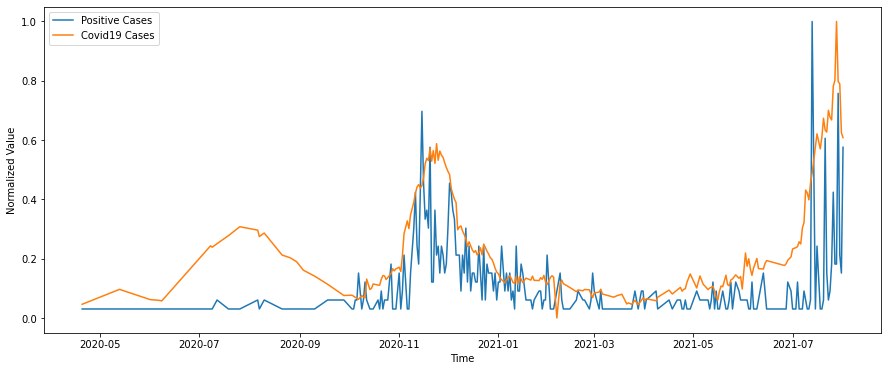

In [ ]:
fig = plt.figure(figsize=(15, 6))

case_Norm = [float(i)/max(InfluenzaData['case'].tolist()) for i in InfluenzaData['case'].tolist()]
casecovid19_Norm = [float(i)/max(InfluenzaData['casecovid19'].tolist()) for i in InfluenzaData['casecovid19'].tolist()]

# potting the points
plt.plot(InfluenzaData['time'], case_Norm, label='Positive Cases')
plt.plot(InfluenzaData['time'], casecovid19_Norm, label='Covid19 Cases')
plt.legend()
plt.ylabel('Normalized Value')
plt.xlabel('Time')
# function to show the plot
# plt.savefig('/content/drive/My Drive/FBHealth/results/PositiveanCovid19.eps',dpi=300, bbox_inches='tight')
plt.show()